<a href="https://colab.research.google.com/github/simsekergun/DATA601/blob/main/Project1/DATA601_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATA 601 Project-1 (Fall 2022)
### Deadline: Novem ber 11, 11:59 pm
Please download these the csv files <br>
File-1: Maryland Statewide Vehicle Crashes:  <br>
https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes/65du-s3qu

File-2: Person Details:  <br>
https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Person-Details-/py4c-dicf

File-3: Vehicle Details:  <br>
https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Vehicle-Details/mhft-5t5y

<br>

We will only use "Accident Year = 2020" data. So, please remove all the unncessary rows. Names these files as "crashes.csv", "persons.csv", and "vehicles.csv", respetively. I will test your notebook with the files I created, so if you have a different naming, your code won't work.

### Q1
From these three csv files, create a single dataframe which will include following columns only <br>
- from the "crashes.csv", accident data (acc_dat), accident time (acc_time), weather description (weather_desc),report no, county (county_desc), latittude, and longitude
- from the "persons.csv", gender, data of birth, and state code
- from the "vehicles.csv", vehicle year, vehicle make, speed limit
<br>

Save your dataframe as a new csv file called "md_crash_2020.csv".

Note: All these csv files have the 'REPORT_NO' column. You need to use that column to combine these datasets.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,date

In [2]:
crashes_df = pd.read_csv("crashes.csv")
#crashes_df.head()


/var/folders/5q/_vfcv0md6kbft5trnpbgz7d40000gn/T/ipykernel_72302/3468984588.py:1: DtypeWarning: Columns (33,45) have mixed types. Specify dtype option on import or set low_memory=False.
  crashes_df = pd.read_csv("crashes.csv")


In [3]:
crashes_df=crashes_df[['ACC_DATE','ACC_TIME','WEATHER_DESC','REPORT_NO', 'COUNTY_DESC','LATITUDE','LONGITUDE','YEAR']]
crashes_df.head()

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,YEAR
0,20200618,15:15:00,Not Applicable,AE58770052,Baltimore,39.277263,-76.503693,2020
1,20220422,22:49:00,NaN,MCP2539001Y,Montgomery,38.992210,-77.097021,2022
2,20201027,17:50:00,NaN,AE63330016,Baltimore,39.323620,-76.503080,2020
3,20220226,12:00:00,NaN,AE6418003H,Baltimore,39.411213,-76.628028,2022
4,20220604,03:02:00,NaN,MDTA1765000Y,Queen Anne's,38.974880,-76.281090,2022


In [4]:
persons_df=pd.read_csv("persons.csv")

/var/folders/5q/_vfcv0md6kbft5trnpbgz7d40000gn/T/ipykernel_72302/3438683214.py:1: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  persons_df=pd.read_csv("persons.csv")


In [5]:
persons_df=persons_df[['SEX_DESC','LICENSE_STATE_CODE','DATE_OF_BIRTH','REPORT_NO']]
persons_df.head()

,SEX_DESC,LICENSE_STATE_CODE,DATE_OF_BIRTH,REPORT_NO
0,Female,MD,19901109,AE59920005
1,Male,NaN,19940925,DA40650004
2,Female,NaN,09-JUL-94,ZU7729000P
3,Male,NaN,20090921,CT8278002X
4,Female,DC,12-JAN-56,DA3660000B


In [6]:
vehicles_df=pd.read_csv("vehicles.csv")

In [7]:
vehicles_df=vehicles_df[['VEH_YEAR','VEH_MAKE','SPEED_LIMIT','REPORT_NO']]
vehicles_df.head()

,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,REPORT_NO
0,NaN,UNKNOWN,25,AE5057004X
1,2018.0,TOYOTA,55,MSP7221001P
2,2019.0,CHEVROLET,30,DA37010040
3,NaN,UNKNOWN,35,MDTA1791002C
4,2002.0,HONDA,35,AE456100BL


In [8]:
crashespersons_df=pd.merge(crashes_df,persons_df,how = 'outer', on ='REPORT_NO')

In [9]:
final_df=pd.merge(crashespersons_df,vehicles_df, how = 'outer', on = 'REPORT_NO')
final_df.shape

(3819104, 14)

In [10]:
final_df=final_df.replace(0, np.nan)

In [11]:
final_df.dropna(inplace=True)

In [12]:
final_df.head()

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,YEAR,SEX_DESC,LICENSE_STATE_CODE,DATE_OF_BIRTH,VEH_YEAR,VEH_MAKE,SPEED_LIMIT
35,20210104.0,15:17:00,Raining,ZJ0498004H,Frederick,39.374625,-77.411962,2021.0,Male,MD,19620622.0,2016.0,JEEP,20.0
36,20210104.0,15:17:00,Raining,ZJ0498004H,Frederick,39.374625,-77.411962,2021.0,Male,MD,19620622.0,2012.0,HONDA,20.0
37,20210104.0,15:17:00,Raining,ZJ0498004H,Frederick,39.374625,-77.411962,2021.0,Female,MD,19930326.0,2016.0,JEEP,20.0
38,20210104.0,15:17:00,Raining,ZJ0498004H,Frederick,39.374625,-77.411962,2021.0,Female,MD,19930326.0,2012.0,HONDA,20.0
53,20220204.0,09:55:00,Raining,AC2362003F,Anne Arundel,39.150977,-76.777078,2022.0,Female,MD,19970513.0,2003.0,NISS,45.0


In [13]:
final_df.shape

(1290454, 14)

In [14]:
final_df = final_df[final_df.YEAR == 2020]
final_df.head()

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,YEAR,SEX_DESC,LICENSE_STATE_CODE,DATE_OF_BIRTH,VEH_YEAR,VEH_MAKE,SPEED_LIMIT
73,20201204.0,21:45:00,Raining,AE5739006G,Baltimore,39.316200,-76.738446,2020.0,Female,MD,19840522.0,2010.0,NISSAN,20.0
168,20200426.0,15:14:00,Raining,ADJ9740010,Baltimore City,39.312903,-76.651472,2020.0,Female,MD,19620826.0,2003.0,NISSAN,25.0
171,20200426.0,15:14:00,Raining,ADJ9740010,Baltimore City,39.312903,-76.651472,2020.0,Female,MD,19620826.0,2006.0,NISSAN,25.0
421,20200430.0,21:40:00,Not Applicable,AE5999005H,Baltimore,39.410576,-76.607619,2020.0,Male,MD,20010216.0,2012.0,BUICK,10.0
422,20200430.0,21:40:00,Not Applicable,AE5999005H,Baltimore,39.410576,-76.607619,2020.0,Male,MD,20010216.0,2011.0,NISS,10.0


In [15]:
final_df.to_csv('md_crash_2020.csv')

In [16]:
df=pd.read_csv('md_crash_2020.csv')
df.head()

,Unnamed: 0,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,YEAR,SEX_DESC,LICENSE_STATE_CODE,DATE_OF_BIRTH,VEH_YEAR,VEH_MAKE,SPEED_LIMIT
0,73,20201204.0,21:45:00,Raining,AE5739006G,Baltimore,39.316200,-76.738446,2020.0,Female,MD,19840522.0,2010.0,NISSAN,20.0
1,168,20200426.0,15:14:00,Raining,ADJ9740010,Baltimore City,39.312903,-76.651472,2020.0,Female,MD,19620826.0,2003.0,NISSAN,25.0
2,171,20200426.0,15:14:00,Raining,ADJ9740010,Baltimore City,39.312903,-76.651472,2020.0,Female,MD,19620826.0,2006.0,NISSAN,25.0
3,421,20200430.0,21:40:00,Not Applicable,AE5999005H,Baltimore,39.410576,-76.607619,2020.0,Male,MD,20010216.0,2012.0,BUICK,10.0
4,422,20200430.0,21:40:00,Not Applicable,AE5999005H,Baltimore,39.410576,-76.607619,2020.0,Male,MD,20010216.0,2011.0,NISS,10.0


In [17]:
df=df.drop(['Unnamed: 0'], axis=1)

### Q2
a. For each county, determine the average age of the drivers who were involved in these accidents  <br>
#b. Then list the sorted averages (from youngest to oldest) <br>

In [18]:
df['DATE_OF_BIRTH'] = pd.to_datetime(df['DATE_OF_BIRTH'], format='%Y%m%d') 

In [19]:
df['DATE_OF_BIRTH']=df['DATE_OF_BIRTH'].astype(str)

In [20]:
def age(DATE_OF_BIRTH):
    DATE_OF_BIRTH = datetime.strptime(DATE_OF_BIRTH, "%Y-%m-%d").date()
    today = date.today()
    return today.year - DATE_OF_BIRTH.year - ((today.month, 
                                      today.day) < (DATE_OF_BIRTH.month, 
                                                    DATE_OF_BIRTH.day))
  

In [21]:
df['AGE'] = df['DATE_OF_BIRTH'].apply(age)

In [22]:
df.groupby('COUNTY_DESC').agg({'AGE':'mean'})

,AGE
COUNTY_DESC,
Allegany,42.751648
Anne Arundel,41.531210
Baltimore,41.841260
Baltimore City,41.028576
Calvert,42.425170
Caroline,41.356401
Carroll,43.603613
Cecil,43.686734
Charles,40.758703


In [23]:
df.groupby('COUNTY_DESC')['AGE'].mean().sort_values()

COUNTY_DESC
Prince George's    40.624658
Charles            40.758703
Howard             40.895081
Baltimore City     41.028576
Queen Anne's       41.177778
Frederick          41.350951
Caroline           41.356401
Worcester          41.419223
St. Mary's         41.431944
Anne Arundel       41.531210
Baltimore          41.841260
Garrett            41.926829
Harford            42.087204
Calvert            42.425170
Montgomery         42.555827
Wicomico           42.564976
Allegany           42.751648
Dorchester         43.349398
Somerset           43.496403
Washington         43.580039
Carroll            43.603613
Cecil              43.686734
Kent               43.696629
Talbot             46.596386
Name: AGE, dtype: float64

### Q3
a. Determine the total number of crashes per "vehicle make". List the sorted values (e.g. Honda, 1234)<br>
b. Determine average age of the car involved in these accidents for each "vehicle make".  <br>

In [24]:
df['TOT_CRASHES']=(df.groupby("VEH_MAKE")['VEH_MAKE'].transform('count'))

In [25]:
df.head()

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,YEAR,SEX_DESC,LICENSE_STATE_CODE,DATE_OF_BIRTH,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,AGE,TOT_CRASHES
0,20201204.0,21:45:00,Raining,AE5739006G,Baltimore,39.316200,-76.738446,2020.0,Female,MD,1984-05-22,2010.0,NISSAN,20.0,38,4546
1,20200426.0,15:14:00,Raining,ADJ9740010,Baltimore City,39.312903,-76.651472,2020.0,Female,MD,1962-08-26,2003.0,NISSAN,25.0,60,4546
2,20200426.0,15:14:00,Raining,ADJ9740010,Baltimore City,39.312903,-76.651472,2020.0,Female,MD,1962-08-26,2006.0,NISSAN,25.0,60,4546
3,20200430.0,21:40:00,Not Applicable,AE5999005H,Baltimore,39.410576,-76.607619,2020.0,Male,MD,2001-02-16,2012.0,BUICK,10.0,21,408
4,20200430.0,21:40:00,Not Applicable,AE5999005H,Baltimore,39.410576,-76.607619,2020.0,Male,MD,2001-02-16,2011.0,NISS,10.0,21,846


In [26]:
data=df.groupby(by='VEH_MAKE').mean()

In [27]:
data = data.reset_index()

In [28]:
data

,VEH_MAKE,ACC_DATE,LATITUDE,LONGITUDE,YEAR,VEH_YEAR,SPEED_LIMIT,AGE,TOT_CRASHES
0,19UDE2F83GA010099,20200925.0,38.932822,-76.894901,2020.0,2016.0,25.0,27.000000,1.0
1,19UUA66248A016140,20200823.0,39.484851,-76.269867,2020.0,2008.0,45.0,45.000000,2.0
2,19XFA1F80AE086879,20200909.0,39.140661,-76.632801,2020.0,2010.0,10.0,53.000000,1.0
3,1B7GG12X02S584286,20200921.0,39.558854,-78.860980,2020.0,2002.0,50.0,43.500000,2.0
4,1B7HF13Y91J534134,20200816.0,38.981788,-76.968191,2020.0,2001.0,20.0,47.333333,3.0
...,...,...,...,...,...,...,...,...,...
897,YOYT,20200304.0,39.351130,-76.682360,2020.0,2017.0,25.0,52.000000,1.0
898,YUKON,20200426.0,38.910597,-76.924293,2020.0,2003.0,30.0,51.000000,2.0
899,YV1622FS3C2044232,20201021.0,39.353556,-76.525217,2020.0,2012.0,30.0,31.000000,2.0
900,YV1SZ58D411016615,20201026.0,39.375548,-76.541189,2020.0,2001.0,30.0,44.500000,2.0


In [29]:
data[['VEH_MAKE','TOT_CRASHES']].sort_values(by='TOT_CRASHES')

,VEH_MAKE,TOT_CRASHES
0,19UDE2F83GA010099,1.0
205,DIDGE,1.0
650,PONTAIC,1.0
647,POLARIS,1.0
210,DODGE TK,1.0
...,...,...
167,CHEVY,2441.0
596,NISSAN,4546.0
785,TOYOTA,6472.0
321,HONDA,6695.0


In [30]:
df=df.replace(0, np.nan)
df.dropna(inplace=True)

In [31]:
def age_car(VEH_YEAR):
    today = date.today()
    age_car = today.year-VEH_YEAR
    return age_car


In [32]:
df['AGE_CAR']=df['VEH_YEAR'].apply(age_car)

In [33]:
df.head()

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,YEAR,SEX_DESC,LICENSE_STATE_CODE,DATE_OF_BIRTH,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,AGE,TOT_CRASHES,AGE_CAR
0,20201204.0,21:45:00,Raining,AE5739006G,Baltimore,39.316200,-76.738446,2020.0,Female,MD,1984-05-22,2010.0,NISSAN,20.0,38,4546,12.0
1,20200426.0,15:14:00,Raining,ADJ9740010,Baltimore City,39.312903,-76.651472,2020.0,Female,MD,1962-08-26,2003.0,NISSAN,25.0,60,4546,19.0
2,20200426.0,15:14:00,Raining,ADJ9740010,Baltimore City,39.312903,-76.651472,2020.0,Female,MD,1962-08-26,2006.0,NISSAN,25.0,60,4546,16.0
3,20200430.0,21:40:00,Not Applicable,AE5999005H,Baltimore,39.410576,-76.607619,2020.0,Male,MD,2001-02-16,2012.0,BUICK,10.0,21,408,10.0
4,20200430.0,21:40:00,Not Applicable,AE5999005H,Baltimore,39.410576,-76.607619,2020.0,Male,MD,2001-02-16,2011.0,NISS,10.0,21,846,11.0


In [34]:
df[["VEH_MAKE","AGE_CAR"]].groupby("VEH_MAKE").mean()

,AGE_CAR
VEH_MAKE,
19UDE2F83GA010099,6.0
19UUA66248A016140,14.0
19XFA1F80AE086879,12.0
1B7GG12X02S584286,20.0
1B7HF13Y91J534134,21.0
...,...
YOYT,5.0
YUKON,19.0
YV1622FS3C2044232,10.0


### Q4
a. Determine all the accidents that happened in a circle centered at (39.016149, -77.117942) with a radius of 5 km. Among them,  <br>
b. Determine the number of accidents where the speed limit was above 51 miles per hour. <br>
c. Determine the number of accidents where the speed limit was below 41 miles per hour.  <br>
<br>
Hint: Please see the "P1_Helper_Distance_From_Coordinates.ipynb" that can be found at https://github.com/simsekergun/DATA601/tree/main/Project1

In [35]:
from math import radians, sin, cos, acos
import numpy as np

In [36]:
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2-lat1)
   delta_lambda = np.radians(lon2-lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)))
   return np.round(res, 2)

In [37]:
lat1=39.016149
lon1=-77.117942

In [38]:
df['ACCIDENTS_CIRCLE']=haversine_distance(lat1, lon1,df['LATITUDE'],df['LONGITUDE'])

In [39]:
df[df['ACCIDENTS_CIRCLE']==5].head()

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,YEAR,SEX_DESC,LICENSE_STATE_CODE,DATE_OF_BIRTH,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,AGE,TOT_CRASHES,AGE_CAR,ACCIDENTS_CIRCLE
12237,20201111.0,23:04:00,Raining,MSP50380085,Montgomery,39.014295,-77.060174,2020.0,Male,MD,1982-07-20,2009.0,HONDA,55.0,40,6695,13.0,5.0


In [40]:
ACC_51=df[df['ACCIDENTS_CIRCLE'] > 51]
ACC_51

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,YEAR,SEX_DESC,LICENSE_STATE_CODE,DATE_OF_BIRTH,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,AGE,TOT_CRASHES,AGE_CAR,ACCIDENTS_CIRCLE
1,20200426.0,15:14:00,Raining,ADJ9740010,Baltimore City,39.312903,-76.651472,2020.0,Female,MD,1962-08-26,2003.0,NISSAN,25.0,60,4546,19.0,52.02
2,20200426.0,15:14:00,Raining,ADJ9740010,Baltimore City,39.312903,-76.651472,2020.0,Female,MD,1962-08-26,2006.0,NISSAN,25.0,60,4546,16.0,52.02
3,20200430.0,21:40:00,Not Applicable,AE5999005H,Baltimore,39.410576,-76.607619,2020.0,Male,MD,2001-02-16,2012.0,BUICK,10.0,21,408,10.0,62.10
4,20200430.0,21:40:00,Not Applicable,AE5999005H,Baltimore,39.410576,-76.607619,2020.0,Male,MD,2001-02-16,2011.0,NISS,10.0,21,846,11.0,62.10
10,20200615.0,11:30:00,Not Applicable,AE5974001W,Baltimore,39.307769,-76.430234,2020.0,Female,MD,1965-07-13,2011.0,CHEVY,30.0,57,2441,11.0,67.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62782,20200207.0,10:02:00,Raining,MDTA1162001Q,Anne Arundel,38.992001,-76.371489,2020.0,Male,MD,1958-06-25,2015.0,DODGE,40.0,64,2400,7.0,64.56
62783,20200114.0,12:34:00,Raining,AE5921006N,Baltimore,39.415545,-76.613480,2020.0,Female,MD,1998-05-25,2011.0,TOYT,35.0,24,1771,11.0,62.14
62784,20200114.0,12:34:00,Raining,AE5921006N,Baltimore,39.415545,-76.613480,2020.0,Female,MD,1998-05-25,2017.0,LINC,35.0,24,85,5.0,62.14
62785,20200114.0,12:34:00,Raining,AE5921006N,Baltimore,39.415545,-76.613480,2020.0,Female,MD,1959-04-30,2011.0,TOYT,35.0,63,1771,11.0,62.14


In [41]:
ACC_41=df[df['ACCIDENTS_CIRCLE'] < 41]
ACC_41

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,YEAR,SEX_DESC,LICENSE_STATE_CODE,DATE_OF_BIRTH,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,AGE,TOT_CRASHES,AGE_CAR,ACCIDENTS_CIRCLE
5,20200529.0,18:36:00,Not Applicable,DA4031006S,Prince George's,38.983515,-76.979973,2020.0,Male,MD,1990-10-25,2008.0,TOYOTA,15.0,32,6472,14.0,12.46
6,20200529.0,18:36:00,Not Applicable,DA4031006S,Prince George's,38.983515,-76.979973,2020.0,Male,MD,1990-10-25,2015.0,MERCEDES,15.0,32,403,7.0,12.46
7,20200529.0,18:36:00,Not Applicable,DA4031006S,Prince George's,38.983515,-76.979973,2020.0,Female,MD,1976-05-07,2008.0,TOYOTA,15.0,46,6472,14.0,12.46
8,20200529.0,18:36:00,Not Applicable,DA4031006S,Prince George's,38.983515,-76.979973,2020.0,Female,MD,1976-05-07,2015.0,MERCEDES,15.0,46,403,7.0,12.46
9,20201217.0,21:30:00,Wintry Mix,DA3167000M,Prince George's,39.034462,-76.918811,2020.0,Male,MD,1971-07-19,2015.0,FORD,5.0,51,7721,7.0,17.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62777,20200302.0,20:50:00,Raining,DA4059005V,Prince George's,38.840888,-76.872746,2020.0,Female,MD,1990-06-12,2011.0,CHEVY,45.0,32,2441,11.0,28.80
62778,20200302.0,20:50:00,Raining,DA4059005V,Prince George's,38.840888,-76.872746,2020.0,Female,MD,1990-06-12,2008.0,NISS,45.0,32,846,14.0,28.80
62779,20200302.0,20:50:00,Raining,DA4059005V,Prince George's,38.840888,-76.872746,2020.0,Female,MD,1992-03-02,2011.0,CHEVY,45.0,30,2441,11.0,28.80
62780,20200302.0,20:50:00,Raining,DA4059005V,Prince George's,38.840888,-76.872746,2020.0,Female,MD,1992-03-02,2008.0,NISS,45.0,30,846,14.0,28.80


### Q5
Download "Licensed Drivers By Sex" data from  <br>
https://github.com/simsekergun/DATA601/tree/main/Project1

a. Determine the number of drivers, who got in a car crash, from non-DMV states as a function of gender and list them <br>
`St Male Female` <br>
`NY 1510  622` <br>
`PA 1251 1312` <br>
... <br>
Note: DMV states: DC, MD, and VA  <br>
 <br>
b. Normalize the previous list with number of male drivers and female drivers for each state. e.g. There are 1 million male drivers in NY and 2 million female drivers, then the normalized numbers should be <br>
<br>
`St    Male_Norm  Female_Norm` <br>
`NY    1.510e-3  0.311e-3` <br>



In [42]:
crashes = pd.read_csv('states_drivers.csv')
crashes.head()

,STATE,MALE,FEMALE
0,Alabama,"1,896,942","2,010,096"
1,Alaska,"251,993","281,234"
2,Arizona,"2,502,985","2,475,777"
3,Arkansas,"1,041,548","1,078,030"
4,California,"12,968,614","12,564,306"


In [43]:
crashes = crashes.drop([8,20,46])

In [44]:
crashes = crashes.replace(',','', regex=True)

In [45]:
crashes = crashes.astype({'MALE': 'int', 'FEMALE': 'int'})

In [46]:
normalized = crashes[['MALE', 'FEMALE']]/crashes[['MALE', 'FEMALE']].max()

In [47]:
normalized

,MALE,FEMALE
0,0.146272,0.159985
1,0.019431,0.022384
2,0.193003,0.197048
3,0.080313,0.085801
4,1.000000,1.000000
5,0.157092,0.154187
6,0.097714,0.103424
7,0.027831,0.030371
9,0.538852,0.578986
10,0.253898,0.287599


###### Q6
a. On which day of the week (Monday through Sunday) do the most of the crashes happen? <br>
b. On which hour of the day (00 - 24) do the most of the crashes happen?  <br>

In [48]:
df.head()

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,YEAR,SEX_DESC,LICENSE_STATE_CODE,DATE_OF_BIRTH,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,AGE,TOT_CRASHES,AGE_CAR,ACCIDENTS_CIRCLE
0,20201204.0,21:45:00,Raining,AE5739006G,Baltimore,39.316200,-76.738446,2020.0,Female,MD,1984-05-22,2010.0,NISSAN,20.0,38,4546,12.0,46.73
1,20200426.0,15:14:00,Raining,ADJ9740010,Baltimore City,39.312903,-76.651472,2020.0,Female,MD,1962-08-26,2003.0,NISSAN,25.0,60,4546,19.0,52.02
2,20200426.0,15:14:00,Raining,ADJ9740010,Baltimore City,39.312903,-76.651472,2020.0,Female,MD,1962-08-26,2006.0,NISSAN,25.0,60,4546,16.0,52.02
3,20200430.0,21:40:00,Not Applicable,AE5999005H,Baltimore,39.410576,-76.607619,2020.0,Male,MD,2001-02-16,2012.0,BUICK,10.0,21,408,10.0,62.10
4,20200430.0,21:40:00,Not Applicable,AE5999005H,Baltimore,39.410576,-76.607619,2020.0,Male,MD,2001-02-16,2011.0,NISS,10.0,21,846,11.0,62.10


In [49]:
df['ACC_DATE']=df['ACC_DATE'].astype(int).astype(str)

In [50]:
df['ACC_DATE']=df['ACC_DATE'].astype('datetime64')

In [51]:
df['DAY'] =(df['ACC_DATE']).dt.strftime('%A')

In [52]:
df['TOT_DAYS']=(df.groupby("DAY")['DAY'].transform('count'))
df.head()

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,YEAR,SEX_DESC,LICENSE_STATE_CODE,DATE_OF_BIRTH,VEH_YEAR,VEH_MAKE,SPEED_LIMIT,AGE,TOT_CRASHES,AGE_CAR,ACCIDENTS_CIRCLE,DAY,TOT_DAYS
0,2020-12-04,21:45:00,Raining,AE5739006G,Baltimore,39.316200,-76.738446,2020.0,Female,MD,1984-05-22,2010.0,NISSAN,20.0,38,4546,12.0,46.73,Friday,11964
1,2020-04-26,15:14:00,Raining,ADJ9740010,Baltimore City,39.312903,-76.651472,2020.0,Female,MD,1962-08-26,2003.0,NISSAN,25.0,60,4546,19.0,52.02,Sunday,5905
2,2020-04-26,15:14:00,Raining,ADJ9740010,Baltimore City,39.312903,-76.651472,2020.0,Female,MD,1962-08-26,2006.0,NISSAN,25.0,60,4546,16.0,52.02,Sunday,5905
3,2020-04-30,21:40:00,Not Applicable,AE5999005H,Baltimore,39.410576,-76.607619,2020.0,Male,MD,2001-02-16,2012.0,BUICK,10.0,21,408,10.0,62.10,Thursday,11856
4,2020-04-30,21:40:00,Not Applicable,AE5999005H,Baltimore,39.410576,-76.607619,2020.0,Male,MD,2001-02-16,2011.0,NISS,10.0,21,846,11.0,62.10,Thursday,11856


In [53]:
days=df.reset_index()

In [54]:
days=df[['DAY','TOT_DAYS']].groupby("DAY").mean().sort_values('TOT_DAYS')
days

,TOT_DAYS
DAY,
Sunday,5905.0
Saturday,7737.0
Tuesday,7878.0
Wednesday,8375.0
Monday,9072.0
Thursday,11856.0
Friday,11964.0


In [55]:
df['TIME'] = pd.to_datetime(df['ACC_TIME']).dt.hour

In [56]:
df['TIME'].value_counts(ascending=False)
# On the 17th hour, the most accidents happened with 4830

17    4830
16    4636
18    4550
15    4108
19    3560
14    3547
12    3200
20    3162
7     2929
13    2873
11    2850
8     2832
21    2778
10    2589
9     2531
6     2417
22    1876
23    1793
5     1342
0     1239
1     1098
2      854
3      600
4      593
Name: TIME, dtype: int64

### Q7
Download "Maryland Average Precipitation and Snow 2020" data from  <br>
https://github.com/simsekergun/DATA601/tree/main/Project1

You need assume that it is a rainy/snowy day if the second column is bigger than 0.05 or if the third column is bigger than 1; otherwise take that day as a non-rainy/snowy day. <br>
a. What is the ratio of the number of accidents that happened in rainy/snowy days to the number of accidents happened in non-rainy/snowy days? <br>
b. What does this ratio tell us?

In [57]:
snow = pd.read_csv('MD2020_Rain_Snow.csv')
snow.head()

,Date,Precip in.,Snow in.
0,1/1/2020,0.00,0
1,1/2/2020,0.00,0
2,1/3/2020,0.19,0
3,1/4/2020,0.21,0
4,1/5/2020,0.15,0


In [58]:
snow.rename(columns = {'Precip in.':'Precip','Snow in.':'Snow'}, inplace = True)

In [59]:
Condition = [(snow['Precip'] > 0.05) | (snow['Snow']>1)]

In [60]:
values = ['Rainy/Snowy']

In [61]:
snow['Weather'] = np.select(Condition, values)

In [62]:
snow=snow.replace({'Weather': '0'}, 'Not Rainy/Snowy')

In [63]:
snow

,Date,Precip,Snow,Weather
0,1/1/2020,0.00,0,Not Rainy/Snowy
1,1/2/2020,0.00,0,Not Rainy/Snowy
2,1/3/2020,0.19,0,Rainy/Snowy
3,1/4/2020,0.21,0,Rainy/Snowy
4,1/5/2020,0.15,0,Rainy/Snowy
...,...,...,...,...
361,12/27/2020,0.00,0,Not Rainy/Snowy
362,12/28/2020,0.00,0,Not Rainy/Snowy
363,12/29/2020,0.00,0,Not Rainy/Snowy
364,12/30/2020,0.00,0,Not Rainy/Snowy


In [64]:
snow.groupby(by='Weather').sum()

,Precip,Snow
Weather,,
Not Rainy/Snowy,1.74,2
Rainy/Snowy,52.23,56


In [65]:
df['ACCIDENTS']=(df.groupby("WEATHER_DESC")['WEATHER_DESC'].transform('count'))
df.head()

,ACC_DATE,ACC_TIME,WEATHER_DESC,REPORT_NO,COUNTY_DESC,LATITUDE,LONGITUDE,YEAR,SEX_DESC,LICENSE_STATE_CODE,...,VEH_MAKE,SPEED_LIMIT,AGE,TOT_CRASHES,AGE_CAR,ACCIDENTS_CIRCLE,DAY,TOT_DAYS,TIME,ACCIDENTS
0,2020-12-04,21:45:00,Raining,AE5739006G,Baltimore,39.316200,-76.738446,2020.0,Female,MD,...,NISSAN,20.0,38,4546,12.0,46.73,Friday,11964,21,37347
1,2020-04-26,15:14:00,Raining,ADJ9740010,Baltimore City,39.312903,-76.651472,2020.0,Female,MD,...,NISSAN,25.0,60,4546,19.0,52.02,Sunday,5905,15,37347
2,2020-04-26,15:14:00,Raining,ADJ9740010,Baltimore City,39.312903,-76.651472,2020.0,Female,MD,...,NISSAN,25.0,60,4546,16.0,52.02,Sunday,5905,15,37347
3,2020-04-30,21:40:00,Not Applicable,AE5999005H,Baltimore,39.410576,-76.607619,2020.0,Male,MD,...,BUICK,10.0,21,408,10.0,62.10,Thursday,11856,21,22042
4,2020-04-30,21:40:00,Not Applicable,AE5999005H,Baltimore,39.410576,-76.607619,2020.0,Male,MD,...,NISS,10.0,21,846,11.0,62.10,Thursday,11856,21,22042


In [66]:
weather=df.groupby('WEATHER_DESC').mean()
weather

,LATITUDE,LONGITUDE,YEAR,VEH_YEAR,SPEED_LIMIT,AGE,TOT_CRASHES,AGE_CAR,ACCIDENTS_CIRCLE,TOT_DAYS,TIME,ACCIDENTS
WEATHER_DESC,,,,,,,,,,,,
"Blowing Sand, Soil, Dirt",38.922138,-76.832854,2020.0,1996.000000,30.000000,42.000000,5.000000,26.000000,26.770000,5905.000000,10.000000,1.0
Blowing Snow,39.446620,-77.399653,2020.0,2013.217949,35.833333,42.782051,2812.217949,8.782051,92.587436,9426.397436,13.089744,78.0
Foggy,39.183225,-76.695155,2020.0,2010.324376,41.356366,42.397313,3349.454894,11.675624,64.668925,9203.829814,8.778631,1563.0
Not Applicable,39.167142,-76.750107,2020.0,2013.281690,34.436530,42.129934,3295.866618,8.718310,50.899882,9149.051084,13.959033,22042.0
Other,39.148055,-76.717727,2020.0,2011.444284,35.354559,40.186686,3214.762663,10.555716,52.418842,9527.568741,13.101302,691.0
Raining,39.130880,-76.744826,2020.0,2012.772673,38.880365,41.240501,3354.593890,9.227327,52.102912,9631.019975,13.452620,37347.0
Severe Winds,39.082023,-76.690977,2020.0,2011.909804,37.019608,45.047059,2950.380392,10.090196,57.649490,10055.470588,14.443137,255.0
Unknown,39.231893,-76.778419,2020.0,2055.585761,26.747573,42.067961,3662.469256,-33.585761,52.787929,9117.485437,13.326861,309.0
Wintry Mix,39.244942,-76.944428,2020.0,2010.439122,38.423154,40.850299,3208.343313,11.560878,58.832375,8966.235529,13.181637,501.0


In [67]:
weather=df.reset_index()

In [68]:
# Assuming Not Applicable to any of the weather conditions listed is accidents that occured on non-rainy/snowy days
# I will take a ratio of that with the sum of Blowing Snow, Wintry Mix and Raining.

(78+37347+501)/22042

1.7206242627710735

In [69]:
#This ratios tells us that an accident occured 1.71 times more on snowy/rainy days than non-snowy/rainy days.

#Q8
Use matplotlib and/or seaborn and show your talent in data visualization. You are free to visualize anything you want regarding this dataset.

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

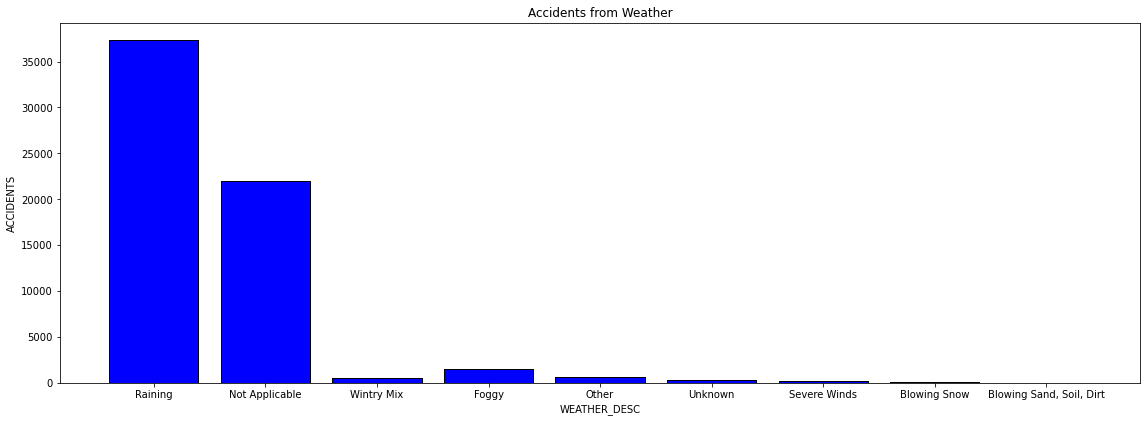

In [71]:
# plot area
fig=plt.figure(figsize=(15,5))

# axes
axes = fig.add_axes([0,0,1,1])
axes.set_xlabel('WEATHER_DESC')
axes.set_ylabel('ACCIDENTS')
axes.set_title('Accidents from Weather')

# bar plot
plt.bar(x=weather['WEATHER_DESC'], height=weather['ACCIDENTS'], color=['b'], edgecolor='black')

plt.show()

